In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import richdem as rd

Leer la Data

In [49]:
filename = './data/02/02.tif'
filename = './data/pre_landslide_test_25639 (4).tif'
gdal_data = gdal.Open(filename)
metadata = gdal_data.GetMetadata()
bands = { gdal_data.GetRasterBand(i + 1).GetDescription(): i for i in range(gdal_data.RasterCount) }
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)[6]

Reemplazar valores faltantes

In [207]:
print(len(data_array[data_array != nodataval]) / (len(data_array[data_array != nodataval]) +
      len(data_array[data_array == nodataval])))
data_array = np.where(data_array == nodataval, np.nan, data_array)

1.0


Graficar la data

In [4]:
print(bands)

{'B4': 0, 'B3': 1, 'B2': 2, 'B8': 3, 'NDVI': 4, 'slope': 5, 'elevation': 6, 'nd_stdDev': 7, 'vis-red': 8, 'vis-green': 9, 'vis-blue': 10, 'GNDVI': 11, 'brightness': 12}


In [40]:
data_array.shape

(6, 6)

In [10]:
def center_crop(img, new_width=None, new_height=None):        

    width = img.shape[1]
    height = img.shape[0]

    if new_width is None:
        new_width = min(width, height)

    if new_height is None:
        new_height = min(width, height)

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))

    if len(img.shape) == 2:
        center_cropped_img = img[top:bottom, left:right]
    else:
        center_cropped_img = img[top:bottom, left:right, ...]

    return center_cropped_img

In [200]:
data_array = center_crop(data_array, 1, 1)

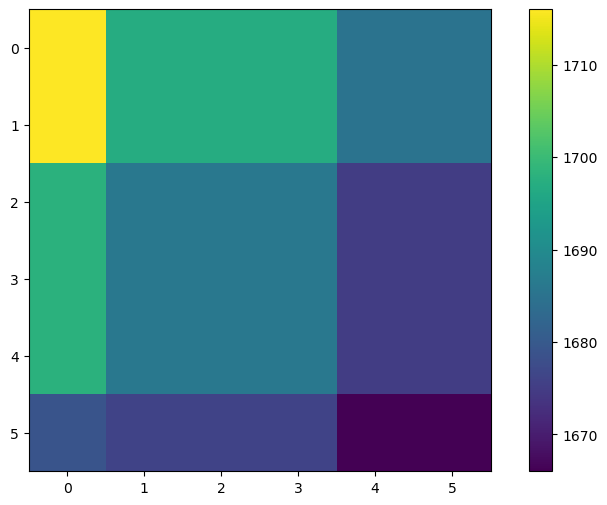

In [30]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(data_array, interpolation='none')
plt.colorbar()
plt.show()

Graficar Curvas de nivel

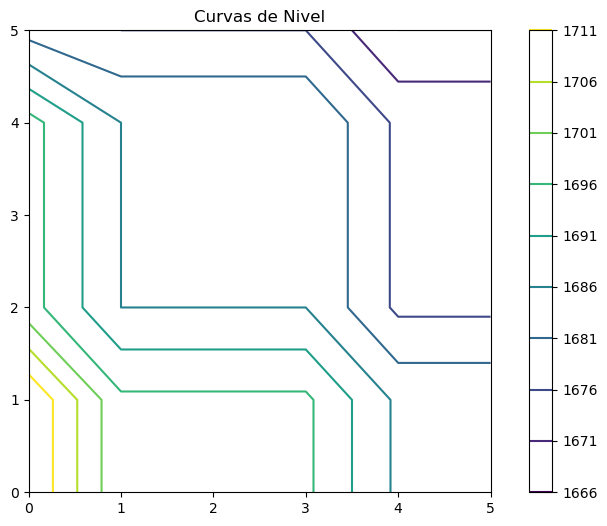

In [31]:
fig = plt.figure(figsize=(10, 6))
min = np.nanmin(data_array)
max = np.nanmax(data_array)
plt.contour(data_array, cmap="viridis",
            levels=list(range(int(min), int(max), int((max - min) / 10))))
plt.title("Curvas de Nivel")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Convertir a rd_array

In [50]:
rd_array = rd.rdarray(data_array, no_data=np.nan)

Graficar angulo de inclinación (en grados)
###### Se calcula la pendiente de una celda focal utilizando una estimación de diferencia central de una superficie ajustada a la celda focal y sus vecinos. La pendiente elegida es la máxima de esta superficie.
###### Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


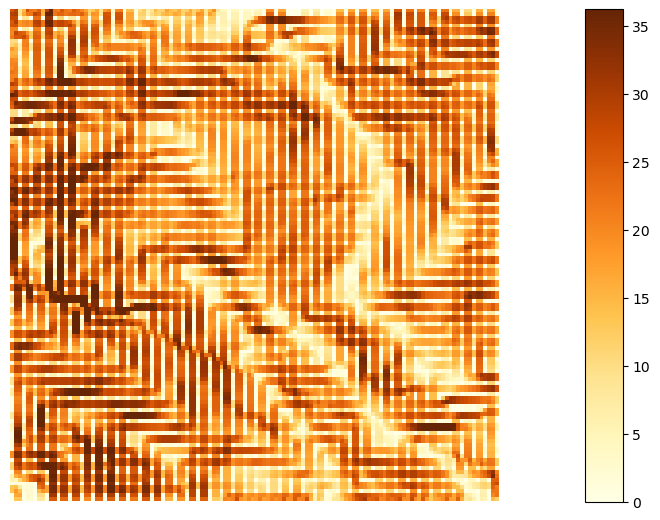

In [63]:
slope = rd.TerrainAttribute(rd_array, attrib='slope_degrees', zscale=0.05)
rd.rdShow(slope, axes=False, cmap='YlOrBr', figsize=(8, 5.5))
plt.show()

In [64]:
# slope
center_crop(slope, 5, 5)

rdarray([[28.203018, 15.376251, 21.70949 , 21.296417, 14.036243],
         [25.116793, 15.376251, 21.25649 , 20.830858, 14.036243],
         [16.699244,  0.      , 15.376251, 15.376251,  0.      ],
         [21.375957, 14.036243, 19.941942, 19.521776, 12.680384],
         [18.42756 , 14.036243, 19.476847, 19.043013, 12.680384]],
        dtype=float32)

In [42]:
# slope
center_crop(rd_array, 5, 5)

rdarray([[32.56453705, 32.56453705, 32.56453705, 27.01795006,
          27.01795006],
         [27.18478966, 27.18478966, 27.18478966, 26.23239899,
          26.23239899],
         [27.18478966, 27.18478966, 27.18478966, 26.23239899,
          26.23239899],
         [27.18478966, 27.18478966, 27.18478966, 26.23239899,
          26.23239899],
         [22.65318489, 22.65318489, 22.65318489, 27.64299965,
          27.64299965]])